Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
#from IPython.display import Image
#from pydot import graph_from_dot_data
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
fraud=pd.read_csv('Fraud_check.csv')

In [39]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [40]:
fraud=fraud.rename({ 'Marital.Status':'Marital_status' , 'Taxable.Income':'Taxable_income' , 'City.Population':'Population' , 'Work.Experience':'Work_exp' },axis=1)

In [41]:
fraud.head()

,Undergrad,Marital_status,Taxable_income,Population,Work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [21]:
fraud.dtypes

Undergrad         object
Marital_status    object
Taxable_income     int64
Population         int64
Work_exp           int64
Urban             object
dtype: object

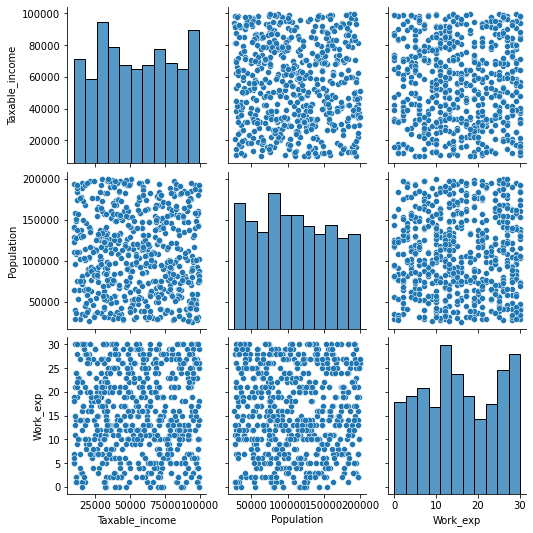

In [42]:
sns.pairplot(fraud)

In [43]:
#-------------------converting from categorical data---------------------------
fraud['Taxable'] = fraud.Taxable_income.map(lambda x: 1 if x<= 30000  else 0)
fraud['Undergrad']=fraud['Undergrad'].astype('category')
fraud['Marital_status']=fraud['Marital_status'].astype('category')
fraud['Urban']=fraud['Urban'].astype('category')
fraud.dtypes

Undergrad         category
Marital_status    category
Taxable_income       int64
Population           int64
Work_exp             int64
Urban             category
Taxable              int64
dtype: object

In [44]:
#label encoding to convert categorical values into numeric.
fraud['Undergrad']=fraud['Undergrad'].cat.codes
fraud['Marital_status']=fraud['Marital_status'].cat.codes
fraud['Urban']=fraud['Urban'].cat.codes
fraud.tail()

,Undergrad,Marital_status,Taxable_income,Population,Work_exp,Urban,Taxable
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0
599,0,0,96519,158137,16,0,0


In [45]:
fraud.isnull().sum()

Undergrad         0
Marital_status    0
Taxable_income    0
Population        0
Work_exp          0
Urban             0
Taxable           0
dtype: int64

In [46]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Undergrad       600 non-null    int8 
 1   Marital_status  600 non-null    int8 
 2   Taxable_income  600 non-null    int64
 3   Population      600 non-null    int64
 4   Work_exp        600 non-null    int64
 5   Urban           600 non-null    int8 
 6   Taxable         600 non-null    int64
dtypes: int64(4), int8(3)
memory usage: 20.6 KB


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

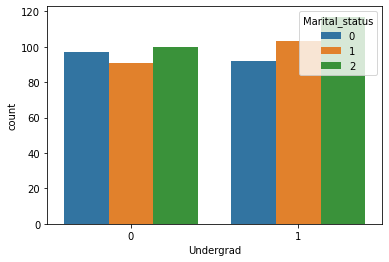

In [51]:
sns.countplot(x='Undergrad',data=fraud,hue='Marital_status')

<AxesSubplot:xlabel='Urban', ylabel='count'>

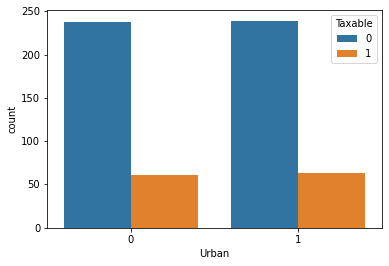

In [57]:
sns.countplot(x='Urban',data=fraud,hue='Taxable')

<AxesSubplot:xlabel='Work_exp', ylabel='count'>

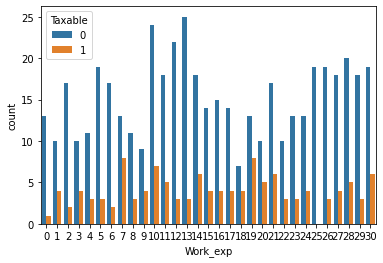

In [58]:
sns.countplot(x='Work_exp',data=fraud,hue='Taxable')

C:\Users\amrut\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Work_exp', ylabel='Density'>

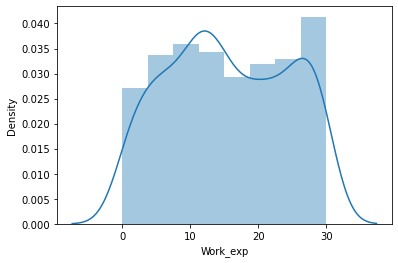

In [52]:
sns.distplot(fraud['Work_exp'])

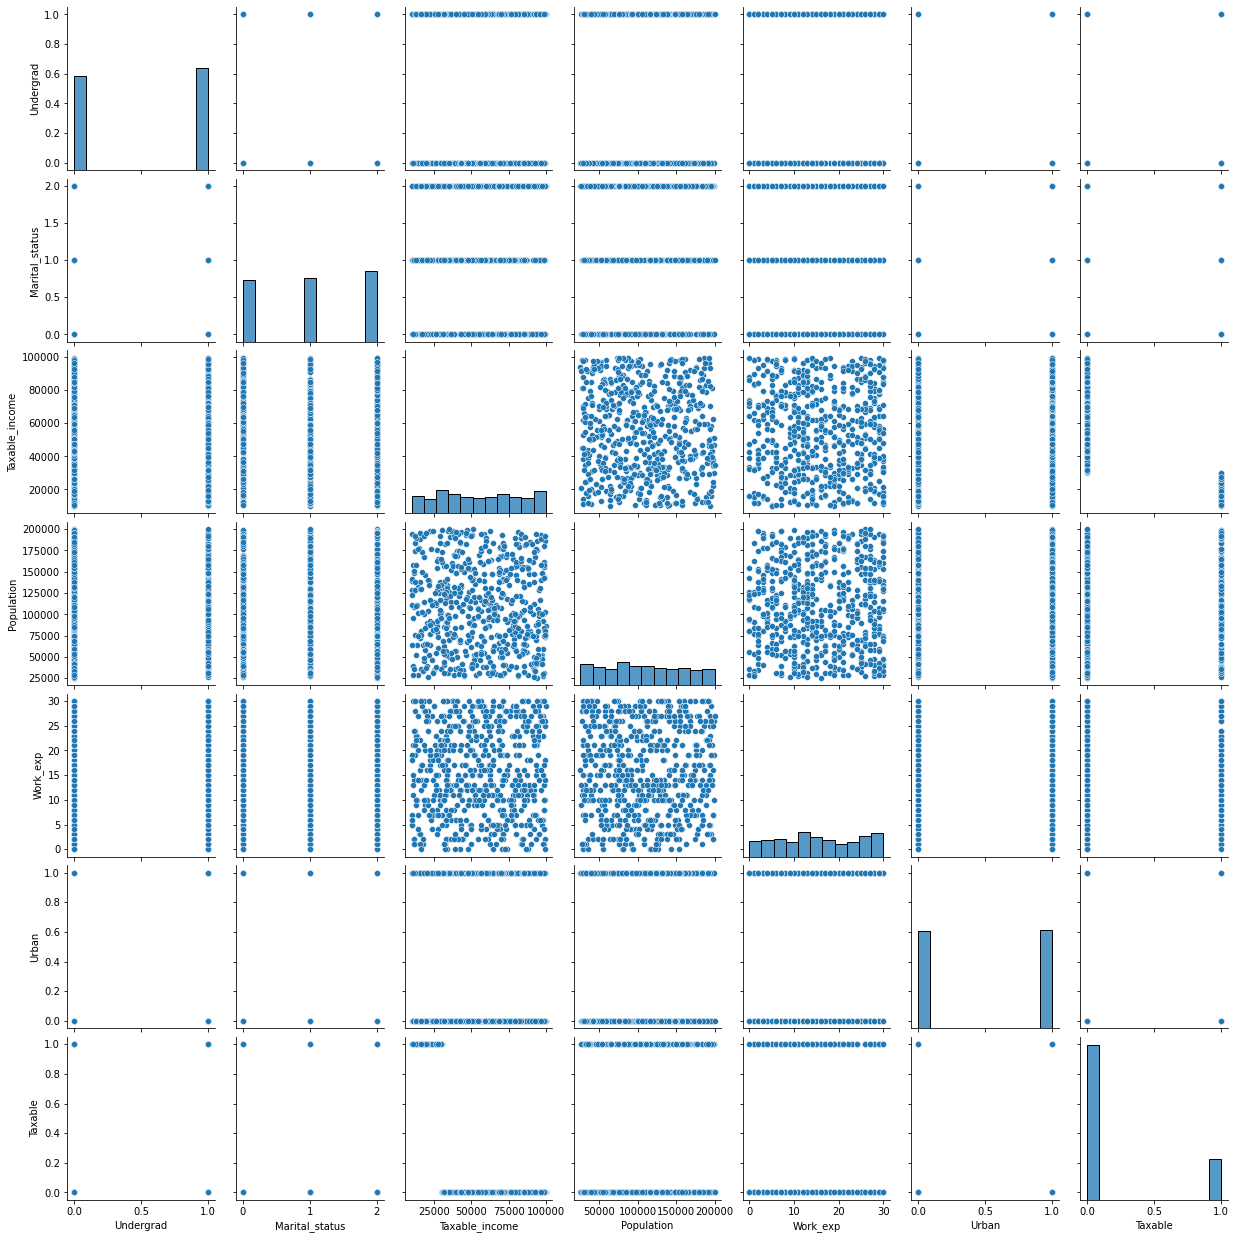

In [55]:
sns.pairplot(fraud)

In [47]:
# setting feature and target variable
feature_cols=['Undergrad','Marital_status','Population','Work_exp','Urban']
x = fraud[feature_cols]
y = fraud.Taxable

In [31]:
# splitting into train and test data
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [32]:
# Building decision tree model
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [33]:
dcmodel = dcmodel.fit(x_train,y_train) #train decision tree
y_predict = dcmodel.predict(x_test)

In [34]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  71.66666666666667


In [35]:
print(confusion_matrix(y_test,y_predict))

[[85 10]
 [24  1]]


In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        95
           1       0.09      0.04      0.06        25

    accuracy                           0.72       120
   macro avg       0.44      0.47      0.44       120
weighted avg       0.64      0.72      0.67       120

